# Análise exploratória da base de dados "Winequality-red.csv" do Módulo 02 do IGIT BOOTCAMP

In [1]:
#importando as bibliotecas
import pandas as pd  #biblioteca para utilizar os dataframes
import numpy as np   #biblioteca para trabalhar de forma otimizada com matrizes e vetores
import matplotlib.pylab as plt  #biblioteca para a construção de gráficos
import seaborn as sn #biblioteca para gráficos mais "bonitos"

In [2]:
#criando o nosso dataframe a partir dos dados
df_vinhos=pd.read_csv("winequality-red.csv", sep=';')

In [3]:
#mostrando o dataset dos vinhos
df_vinhos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Quantas instâncias e atributos possuem o dataset?**

In [4]:
instancias,atributos = df_vinhos.shape

In [5]:
print("O dataset possue {} instâncias e {} atributos".format(instancias,atributos))

O dataset possue 1599 instâncias e 12 atributos


**Existem valores nulos?**

In [6]:
df_vinhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#contando os valores
df_vinhos.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
print("Existem {} atributos do tipo {} e {} atributos do tipo {}.".format(df_vinhos.dtypes.value_counts()[0],df_vinhos.dtypes.value_counts().index[0],df_vinhos.dtypes.value_counts()[1], df_vinhos.dtypes.value_counts().index[1]))

Existem 11 atributos do tipo float64 e 1 atributos do tipo int64.


In [9]:
#aplicando as "estatísticas" para o dataset
df_vinhos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
#encontrando a mediana
df_vinhos.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

**Aplicando a matriz de correlação**

In [11]:
#matriz de correlação não gráfica
df_vinhos.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### Observando o heatmap de correlação abaixo que a qualidade do vinho tem grande correlação com a quantidade de alcool, os sufactantes, a volatilidade da acidez, a acidez crítica

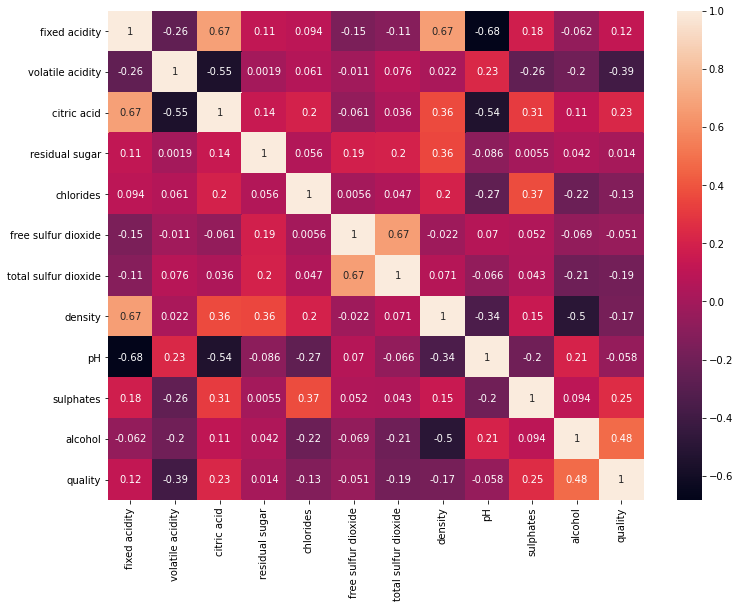

In [12]:
#matriz de correlação plotada
plt.figure(figsize=(12,9))
matriz_correlacao=df_vinhos.corr()
sn.heatmap(matriz_correlacao, annot=True)
plt.show()

## Agora vamos fazer uma série de plot para melhor visualizar a correlação entre as variaveis

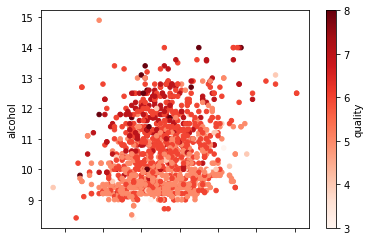

In [55]:
%matplotlib inline
from matplotlib import style
style.use("seaborn-colorblind")
#df_vinhos.plot(x='pH', y='alcohol', c='quality', kind='scatter' , colormap='Reds')
plt.plot(x=df_vinhos['pH'], y=df_vinhos['alcohol'], c=df_vinhos['quality'], kind='scatter' , colormap='Reds')

### Podemos observar que existe um correlação inversa entre a densidade do vinho e a quantidade de alcool nele

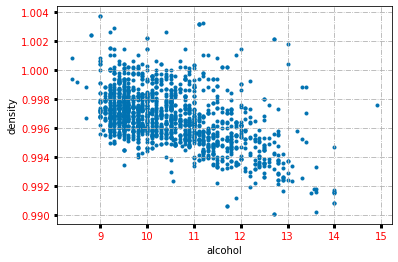

In [47]:
fig, ax = plt.subplots()
plt.scatter(df_vinhos['alcohol'], df_vinhos['density'],marker='.')

plt.grid(True, linestyle='-.')
plt.tick_params(labelcolor='r', labelsize='medium', width=3)
plt.xlabel("alcohol")
plt.ylabel("density")
plt.show()

### Podemos observar que existe um correlação entre os sufactantes e "chlorides", vemos que temos uma grande concentração de "Chlorides" em 0.1

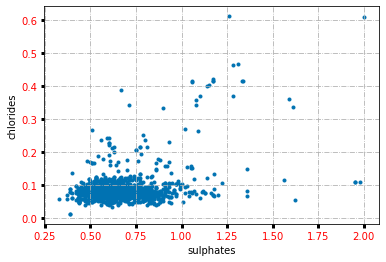

In [57]:
fig, ax = plt.subplots()
plt.scatter(df_vinhos['sulphates'], df_vinhos['chlorides'],marker='.')

plt.grid(True, linestyle='-.')
plt.tick_params(labelcolor='r', labelsize='medium', width=3)
plt.xlabel("sulphates")
plt.ylabel("chlorides")
plt.show()

### Podemos observar que existe uma correlação negativa entre a acidez crítica e a "Volatilie acidity"

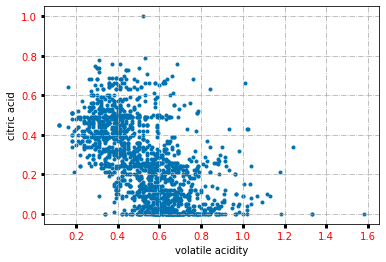

In [59]:
fig, ax = plt.subplots()
plt.scatter(df_vinhos['volatile acidity'], df_vinhos['citric acid'],marker='.')

plt.grid(True, linestyle='-.')
plt.tick_params(labelcolor='r', labelsize='medium', width=3)
plt.xlabel("volatile acidity")
plt.ylabel("citric acid")
plt.show()

## Separação em Features (Entradas) e Target (Saída)

In [13]:
#dividindo o dataset entre entrada e saída
entradas=df_vinhos.iloc[:,:-1] #seleciona todas as colunas menor a última
saida=df_vinhos.iloc[:,-1] #seleciona apenas a coluna de qualidade do vinho 

In [14]:
entradas.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [15]:
saida.head(5)

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

**Quantas instâncias existem para a qualidade do vinho igual a 5?**

In [16]:
#identificando as instâncias existentes para os dados
df_vinhos['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [17]:
df_vinhos['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

## Criando uma nova base de dados, na qual a classificação é binária onde vinhos com qualidade superior a 5 é considerado bom (1) 

In [18]:
#modificando o dataset
new_df=df_vinhos.copy()
new_df['nova_qualidade']=new_df['quality'].apply(lambda x: 0 if x<=5 else 1)

In [19]:
new_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,nova_qualidade
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


In [21]:
# Como criamos um novo target, podemos retirar o quality anterior
new_df.drop('quality', axis=1, inplace=True)

### Após a criação do novo target, podemos observar que o alcool, "volatile acidity", "sulphates" e "total sufur dioxide"

#### Podemos observar que nessa nova base houve uma mudança de importancia entre "citric acid" para o "total sufur dioxide"

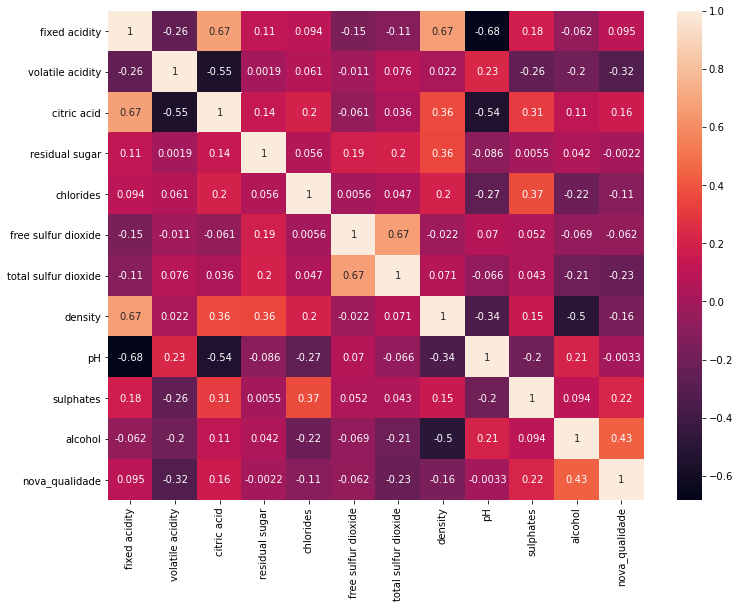

In [22]:
#matriz de correlação plotada da nova base de dados
plt.figure(figsize=(12,9))
matriz_correlacao=new_df.corr()
sn.heatmap(matriz_correlacao, annot=True)
plt.show()

### Podemos observar que existe uma correlação positiva entre a quantidade total de ácido sufúrico e a quantidade de ácido livre, ou seja, quanto maior a quantidade de ácido maior a quantidade de ácido livre

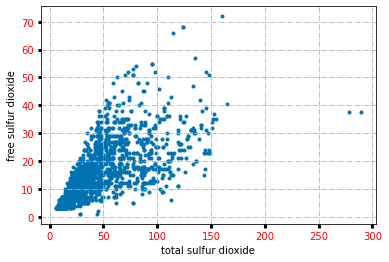

In [60]:
fig, ax = plt.subplots()
plt.scatter(df_vinhos['total sulfur dioxide'], df_vinhos['free sulfur dioxide'],marker='.')

plt.grid(True, linestyle='-.')
plt.tick_params(labelcolor='r', labelsize='medium', width=3)
plt.xlabel("total sulfur dioxide")
plt.ylabel("free sulfur dioxide")
plt.show()